# FER Experiments
### Datasets
- FER2013
- CK+
- AffectNet
- MELD
- IEMOCAP

In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('..', '..')) 
sys.path.insert(0, module_path)
from src.data_loading import load_rafbd, load_ck, load_fer2013, load_affectnet, load_meld, filter_emotions, load_iemocap
from src.evaluation import plot_confusion_matrix, plot_training_history

ck = filter_emotions(load_ck())
fer = filter_emotions(load_fer2013())
raf = filter_emotions(load_rafbd())
affnet = filter_emotions(load_affectnet())
meld_train = filter_emotions(load_meld("train"))
meld_val = filter_emotions(load_meld("dev"))
meld_test = filter_emotions(load_meld("test"))
iemocap = filter_emotions(load_iemocap())

/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Subfolders in the dataset: ['ckextended.csv']
Subfolders in the dataset: ['fer2013.csv']
First few rows of the dataframe:
   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
Subfolders: ['train_labels.csv', 'test_labels.csv', 'DATASET']
Subfolders in the dataset: ['7', '6', '1', '4', '3', '2', '5']


100%|██████████| 3068/3068 [00:00<00:00, 6184.60it/s]


Dataset downloaded to: /Users/krazmic/.cache/kagglehub/datasets/mstjebashazida/affectnet/versions/1
Available folders: ['happy', 'Contempt', 'sad', 'fear', 'surprise', 'neutral', 'Anger', 'disgust']


100%|██████████| 8/8 [00:04<00:00,  1.63it/s]


Subfolders in the dataset: ['JSON files', 'MELD.Raw']
Subfolders in the raw data: ['dia47_utt11.mp4', 'dia35_utt2.mp4', 'dia956_utt14.mp4', 'dia1032_utt1.mp4', 'dia47_utt9.mp4', 'dia645_utt11.mp4', 'dia572_utt20.mp4', 'dia457_utt2.mp4', 'dia969_utt0.mp4', 'dia232_utt4.mp4', 'dia940_utt7.mp4', 'dia619_utt5.mp4', 'dia1033_utt1.mp4', 'dia46_utt9.mp4', 'dia456_utt2.mp4', 'dia34_utt2.mp4', 'dia630_utt2.mp4', 'dia424_utt9.mp4', 'dia941_utt7.mp4', 'dia288_utt16.mp4', 'dia968_utt0.mp4', 'dia351_utt14.mp4', 'dia752_utt6.mp4', 'dia351_utt0.mp4', 'dia823_utt3.mp4', 'dia851_utt8.mp4', 'dia810_utt14.mp4', 'dia137_utt0.mp4', 'dia379_utt7.mp4', 'dia136_utt0.mp4', 'dia822_utt3.mp4', 'dia350_utt0.mp4', 'dia206_utt6.mp4', 'dia782_utt5.mp4', 'dia1006_utt3.mp4', 'dia28_utt7.mp4', 'dia195_utt8.mp4', 'dia463_utt0.mp4', 'dia605_utt0.mp4', 'dia334_utt10.mp4', 'dia933_utt10.mp4', 'dia783_utt5.mp4', 'dia975_utt5.mp4', 'dia207_utt6.mp4', 'dia823_utt12.mp4', 'dia604_utt0.mp4', 'dia29_utt7.mp4', 'dia380_utt3.mp4',

## Processing

In [2]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import cv2
from PIL import Image

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def get_face_frames(file_path):

    cap = cv2.VideoCapture(file_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_interval = int(fps * 1)  # Every 1 second
    frame_count = 0
    frames = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        if frame_count % frame_interval == 0:
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray, 1.3, 5)
            if len(faces) > 0:
                x, y, w, h = faces[0]
                face_img = frame[y:y+h, x:x+w]
                pil_image = Image.fromarray(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
            else:
                pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

            frames.append(pil_image)
                
        frame_count += 1

    cap.release()

    return frames


#meld_train_frames = meld_train['filename'].progress_apply(get_face_frames)
#meld_test_frames = pd.read_pickle("meld_train_frames.pkl")
#meld_val_frames = meld_val['filename'].progress_apply(get_face_frames)
#meld_test_frames = meld_test['filename'].progress_apply(get_face_frames)

| Model type                                             | Preferred encoding                | Why                                                                                                                        |
| ------------------------------------------------------ | --------------------------------- | -------------------------------------------------------------------------------------------------------------------------- |
| **Neural nets with `softmax`**                         | ✅ `to_categorical` (one-hot)      | The model outputs a probability distribution per class; training requires a one-hot target for `categorical_crossentropy`. |
| **Neural nets with `sparse_categorical_crossentropy`** | ✅ Integer labels (`LabelEncoder`) | TensorFlow automatically interprets integer classes.                                                                       |
| **Classical ML (SVM, RF, LR, etc.)**                   | ✅ Integer labels (`LabelEncoder`) | These models require discrete integer labels.                                                                              |
| **Binary classification (sigmoid output)**             | Either `0/1` or `[1,0]/[0,1]`     | Just keep it consistent with your loss function (`binary_crossentropy`).                                                   |


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from fer_cnn_utils import preprocess_frame, build_light_cnn
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten,
    Dense, Dropout, BatchNormalization, Input
)
from tensorflow.keras.callbacks import (
    ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
)

def preprocess_frame(frame, target_size=(48, 48)):

    # ensure frame is in RGB mode (convert from RGBA, L, or P if needed)
    if not frame.mode == 'RGB':
        frame = frame.convert('RGB')
    
    np_frame = np.array(frame)
    gray = cv2.cvtColor(np_frame, cv2.COLOR_RGB2GRAY)
    resized = cv2.resize(gray, target_size)

    # normalize and add channel dimension
    resized = resized.astype("float32") / 255.0
    resized = np.expand_dims(resized, axis=-1)

    return resized

def build_light_cnn(input_shape=(48, 48, 1), num_classes=7):
    """
    Lightweight CNN for emotion recognition from frames.
    """
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Conv2D(256, (3,3), activation='relu', padding='same',),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Flatten(),
        Dropout(0.7),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Callbacks for better training control
callbacks = [
    # Save only the best model (based on validation accuracy)
    ModelCheckpoint(
    "best_cnn_model.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
    ),
    # Stop early if no improvement
    EarlyStopping(
        monitor="val_accuracy",
        patience=20,
        restore_best_weights=True,
        verbose=1
    ),
    # Reduce learning rate when validation stops improving
    ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=1
    )
]

In [4]:
from sklearn.metrics import classification_report

# MELD

In [1]:
def safe_preprocess_frame(frame_list, target_size=(48, 48)):
    """
    Handle missing or empty frame lists by replacing with a black image.
    """
    if isinstance(frame_list, list) and len(frame_list) > 0:
        frame = frame_list[0]
        return preprocess_frame(frame, target_size)
    else:
        # Create a black image placeholder
        black = np.zeros((*target_size, 1), dtype=np.float32)
        return black

cnn = build_light_cnn()
X_train = np.stack([safe_preprocess_frame(f) for f in meld_train_frames])
X_val   = np.stack([safe_preprocess_frame(f) for f in meld_val_frames])
X_test  = np.stack([safe_preprocess_frame(f) for f in meld_test_frames])
y_train, y_val, y_test = meld_train['label'].values, meld_train['label'].values, meld_train['label'].values

# Encode string labels -> integers
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

cnn = build_light_cnn()

history = cnn.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=callbacks,
)

plot_training_history(history)

NameError: name 'build_light_cnn' is not defined

In [ ]:
y_pred_probs = cnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
y_test = label_encoder.inverse_transform(y_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_test)

In [3]:
from sklearn.base import BaseEstimator
import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


class EmotionClassifier(BaseEstimator):
    def __init__(self, pipeline, label_encoder):
        self.pipeline = pipeline
        self.label_encoder = label_encoder

    def predict(self, X):
        y_pred = self.pipeline.predict(X)
        return self.label_encoder.inverse_transform(y_pred)

    def predict_proba(self, X):
        return self.pipeline.predict_proba(X)



# --- Keras Classifier Wrapper ---
cnn_estimator = KerasClassifier(
    model=build_light_cnn,
    model__input_shape=(48,48,1),
    model__num_classes=len(np.unique(y_train)),
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=callbacks
)

cnn_pipeline = Pipeline([
    ("cnn", cnn_estimator)
])


ModuleNotFoundError: No module named 'scikeras'

In [ ]:

clf = EmotionClassifier(cnn_pipeline, label_encoder)
joblib.dump(clf, "meld_emotion_classifier.joblib")

clf = joblib.load("meld_emotion_classifier.joblib")
preds = clf.predict(X_test)
preds

# FER2013

In [5]:
import numpy as np
from PIL import Image
import cv2

def preprocess_fer_row(pixels_str, target_size=(48, 48)):
    # Convert string of space-separated pixel values to 2D image
    pixels = np.fromstring(pixels_str, sep=' ', dtype=np.uint8)
    pixels = pixels.reshape(target_size)
    # Convert to float, normalize, and expand dims
    pixels = pixels.astype("float32") / 255.0
    pixels = np.expand_dims(pixels, axis=-1)
    return pixels

2025-10-21 17:39:20.604722: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-10-21 17:39:20.604765: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-10-21 17:39:20.604772: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-10-21 17:39:20.604800: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-21 17:39:20.604814: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100


2025-10-21 17:39:21.205797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


783/785 [============================>.] - ETA: 0s - loss: 3.7003 - accuracy: 0.2325
Epoch 1: val_accuracy improved from -inf to 0.24837, saving model to best_cnn_model.h5
785/785 [==============================] - 12s 14ms/step - loss: 3.6983 - accuracy: 0.2326 - val_loss: 2.8149 - val_accuracy: 0.2484 - lr: 0.0010
Epoch 2/100
  6/785 [..............................] - ETA: 9s - loss: 2.6735 - accuracy: 0.3438 

/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


784/785 [============================>.] - ETA: 0s - loss: 2.6396 - accuracy: 0.3206
Epoch 2: val_accuracy improved from 0.24837 to 0.36281, saving model to best_cnn_model.h5
785/785 [==============================] - 11s 14ms/step - loss: 2.6391 - accuracy: 0.3205 - val_loss: 1.6841 - val_accuracy: 0.3628 - lr: 0.0010
Epoch 3/100
783/785 [============================>.] - ETA: 0s - loss: 2.1381 - accuracy: 0.3737
Epoch 3: val_accuracy did not improve from 0.36281
785/785 [==============================] - 12s 16ms/step - loss: 2.1379 - accuracy: 0.3738 - val_loss: 2.0068 - val_accuracy: 0.3552 - lr: 0.0010
Epoch 4/100
785/785 [==============================] - ETA: 0s - loss: 1.8937 - accuracy: 0.4048
Epoch 4: val_accuracy improved from 0.36281 to 0.39012, saving model to best_cnn_model.h5
785/785 [==============================] - 12s 15ms/step - loss: 1.8937 - accuracy: 0.4048 - val_loss: 1.5896 - val_accuracy: 0.3901 - lr: 0.0010
Epoch 5/100
784/785 [============================>.]

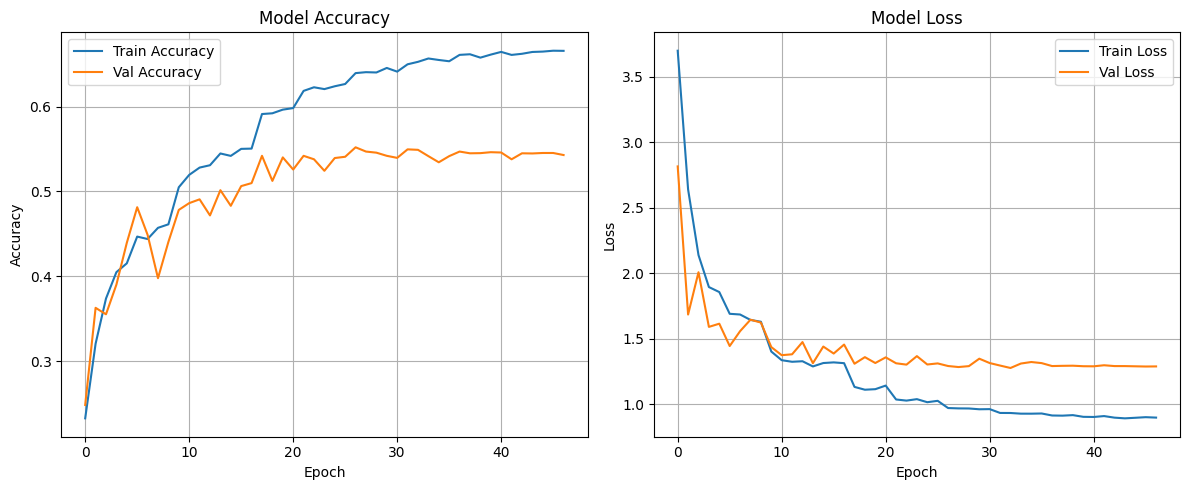

In [6]:


# Apply preprocessing to all rows
X = np.array([preprocess_fer_row(p) for p in fer["pixels"]])
y = fer['label'].values

# Encode string labels -> integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded, shuffle=True
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp, shuffle=True
)

cnn = build_light_cnn()
history = cnn.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=callbacks,
)

plot_training_history(history)

169/169 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

       angry       0.48      0.47      0.47       743
     disgust       0.71      0.15      0.24        82
        fear       0.43      0.32      0.37       768
       happy       0.71      0.82      0.76      1349
     neutral       0.53      0.49      0.51       930
         sad       0.41      0.46      0.43       912
    surprise       0.70      0.69      0.70       600

    accuracy                           0.56      5384
   macro avg       0.56      0.49      0.50      5384
weighted avg       0.55      0.56      0.55      5384



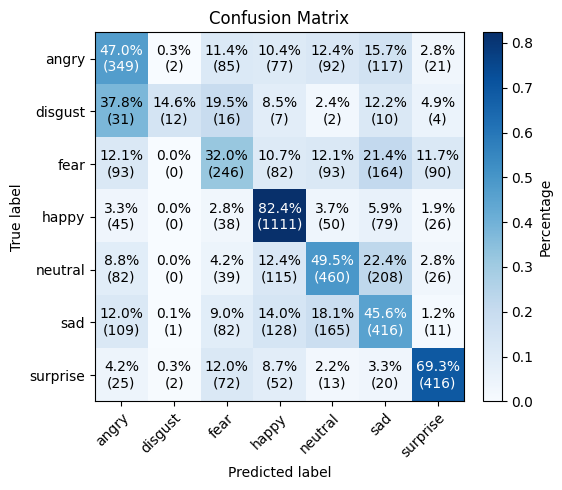

In [8]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

y_pred_probs = cnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
y_test = label_encoder.inverse_transform(y_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

In [8]:
import joblib
from tensorflow.keras.models import load_model

# Save after fitting
joblib.dump(label_encoder, "label_encoder_FER2013.joblib")

['label_encoder_FER2013.joblib']

### Test CK model on FER2013 (Trocado)

1122/1122 [==============================] - 6s 5ms/step
              precision    recall  f1-score   support

       angry       0.23      0.05      0.08      4953
     disgust       0.02      0.17      0.04       547
        fear       0.18      0.01      0.03      5121
       happy       0.65      0.06      0.11      8989
     neutral       0.20      0.81      0.33      6198
         sad       0.20      0.06      0.09      6077
    surprise       0.39      0.26      0.32      4002

    accuracy                           0.21     35887
   macro avg       0.27      0.20      0.14     35887
weighted avg       0.33      0.21      0.15     35887



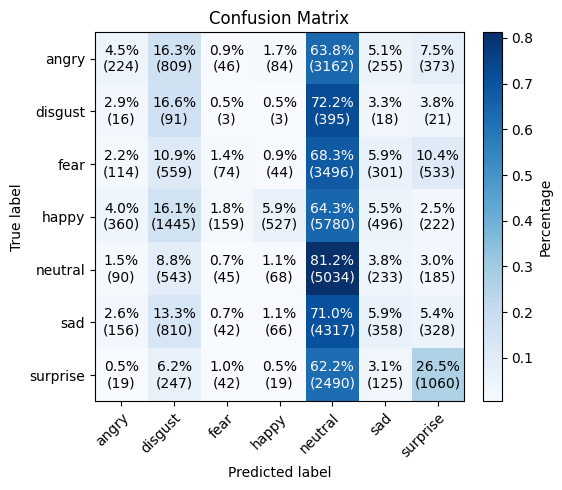

In [19]:
# Apply preprocessing to all rows
X = np.array([preprocess_fer_row(p) for p in fer["pixels"]])
y = fer['label'].values

# Load CK model
label_encoder_ck = joblib.load("label_encoder_CK.joblib")
model = load_model("best_cnn_model_CK.h5")

# Encode string labels -> integers
y_encoded = label_encoder_ck.transform(y)


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded, shuffle=True
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp, shuffle=True
)

y_pred_probs = model.predict(X)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder_ck.inverse_transform(y_pred)

print(classification_report(y, y_pred))
plot_confusion_matrix(y, y_pred)


In [10]:
y_pred_probs = cnn.predict(X)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred_labels = label_encoder_ck.inverse_transform(y_pred)

print(classification_report(y, y_pred))
plot_confusion_matrix(y, y_pred)

1122/1122 [==============================] - 6s 6ms/step


NameError: name 'label_encoder_ck' is not defined

### Test Fer2013 model on RAF-DB

15/15 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

       angry       0.24      0.62      0.35        24
     disgust       0.00      0.00      0.00        24
        fear       0.14      0.36      0.20        11
       happy       0.67      0.78      0.72       178
     neutral       0.62      0.39      0.48       102
         sad       0.26      0.33      0.29        72
    surprise       0.80      0.08      0.15        50

    accuracy                           0.49       461
   macro avg       0.39      0.37      0.31       461
weighted avg       0.54      0.49      0.47       461



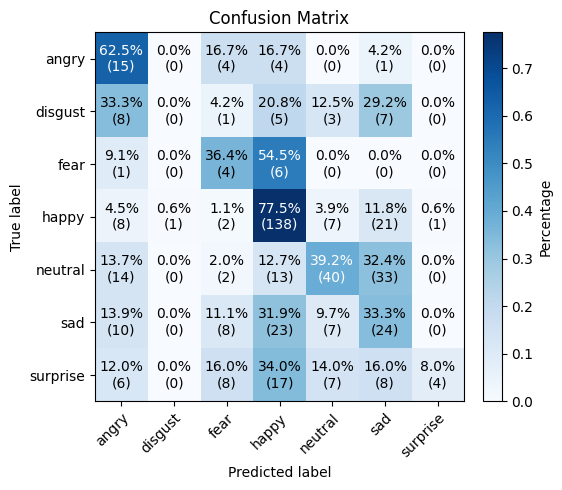

In [11]:
def preprocess_raf_row(filename):

    # read and convert image to grayscale
    image = Image.open(filename).convert('L')
    image = image.resize((48, 48))
    np_image = np.array(image).astype("float32") / 255.0
    np_image = np.expand_dims(np_image, axis=-1)
    return np_image


# Apply preprocessing to all rows
X = np.array([preprocess_raf_row(p) for p in raf["filename"]])
y = raf['label'].values

y_encoded = label_encoder.transform(y)

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded, shuffle=True
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp, shuffle=True
)

y_pred_probs = cnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

print(classification_report(y_test_labels, y_pred))
plot_confusion_matrix(y_test_labels, y_pred)

96/96 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

       angry       0.22      0.44      0.29       162
     disgust       0.00      0.00      0.00       160
        fear       0.12      0.26      0.16        74
       happy       0.68      0.86      0.76      1185
     neutral       0.60      0.39      0.48       680
         sad       0.27      0.33      0.30       478
    surprise       0.96      0.14      0.25       329

    accuracy                           0.52      3068
   macro avg       0.41      0.35      0.32      3068
weighted avg       0.56      0.52      0.49      3068



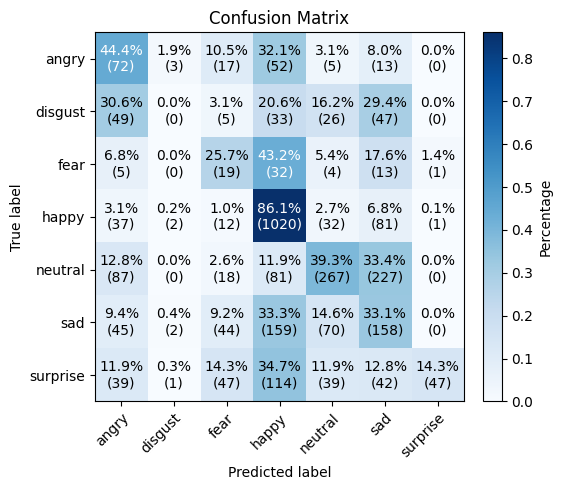

In [12]:
y_pred_probs = cnn.predict(X)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_encoded)

print(classification_report(y_test_labels, y_pred))
plot_confusion_matrix(y_test_labels, y_pred)

### Test FER2013 model on AffectNet

62/62 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

       angry       0.24      0.36      0.29       258
     disgust       0.00      0.00      0.00       187
        fear       0.42      0.15      0.22       250
       happy       0.49      0.71      0.58       405
     neutral       0.20      0.24      0.22       356
         sad       0.18      0.30      0.22       237
    surprise       0.45      0.14      0.21       288

    accuracy                           0.31      1981
   macro avg       0.28      0.27      0.25      1981
weighted avg       0.31      0.31      0.28      1981



/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

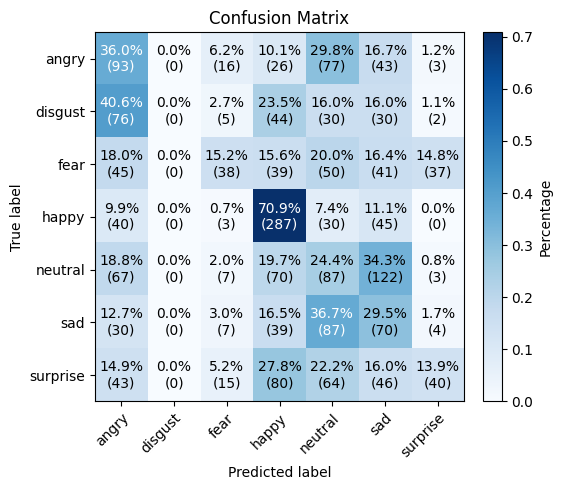

In [13]:
# Apply preprocessing to all rows
X = np.array([preprocess_raf_row(p) for p in affnet["filename"]])
y = affnet['label'].values

y_encoded = label_encoder.transform(y)

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded, shuffle=True
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp, shuffle=True
)

y_pred_probs = cnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

print(classification_report(y_test_labels, y_pred))
plot_confusion_matrix(y_test_labels, y_pred)

413/413 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

       angry       0.25      0.39      0.30      1718
     disgust       1.00      0.00      0.00      1248
        fear       0.35      0.13      0.19      1664
       happy       0.49      0.70      0.58      2704
     neutral       0.20      0.24      0.22      2368
         sad       0.17      0.28      0.21      1584
    surprise       0.43      0.16      0.23      1920

    accuracy                           0.31     13206
   macro avg       0.41      0.27      0.25     13206
weighted avg       0.39      0.31      0.28     13206



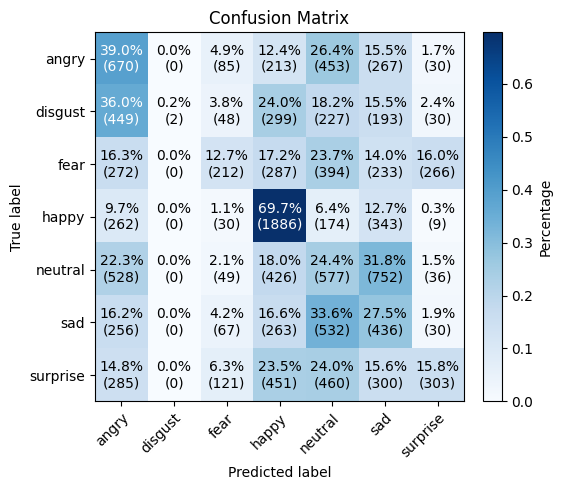

In [14]:
y_pred_probs = cnn.predict(X)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_encoded)

print(classification_report(y_test_labels, y_pred))
plot_confusion_matrix(y_test_labels, y_pred)

# CK+

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 5.6672 - accuracy: 0.4849
Epoch 1: val_accuracy did not improve from 0.55192
20/20 [==============================] - 1s 49ms/step - loss: 5.6672 - accuracy: 0.4849 - val_loss: 2.5333 - val_accuracy: 0.0296 - lr: 0.0010
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 3.4312 - accuracy: 0.5182
Epoch 2: val_accuracy did not improve from 0.55192
20/20 [==============================] - 0s 19ms/step - loss: 3.4312 - accuracy: 0.5182 - val_loss: 2.3762 - val_accuracy: 0.0296 - lr: 0.0010
Epoch 3/100
17/20 [========================>.....] - ETA: 0s - loss: 2.6398 - accuracy: 0.5607
Epoch 3: val_accuracy did not improve from 0.55192
20/20 [==============================] - 0s 19ms/step - loss: 2.5477 - accuracy: 0.5832 - val_loss: 2.6283 - val_accuracy: 0.0296 - lr: 0.0010
Epoch 4/100
20/20 [==============================] - ETA: 0s - loss: 2.3232 - accuracy: 0.6117
Epoch 4: val_accuracy did not improve 

/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


20/20 [==============================] - ETA: 0s - loss: 1.0628 - accuracy: 0.7591
Epoch 9: val_accuracy did not improve from 0.65926
20/20 [==============================] - 0s 18ms/step - loss: 1.0628 - accuracy: 0.7591 - val_loss: 2.4162 - val_accuracy: 0.6593 - lr: 2.5000e-04
Epoch 10/100
20/20 [==============================] - ETA: 0s - loss: 1.0418 - accuracy: 0.7575
Epoch 10: val_accuracy did not improve from 0.65926
20/20 [==============================] - 0s 18ms/step - loss: 1.0418 - accuracy: 0.7575 - val_loss: 2.5730 - val_accuracy: 0.6593 - lr: 2.5000e-04
Epoch 11/100
17/20 [========================>.....] - ETA: 0s - loss: 0.9296 - accuracy: 0.8015
Epoch 11: val_accuracy did not improve from 0.65926

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
20/20 [==============================] - 0s 18ms/step - loss: 0.9243 - accuracy: 0.8019 - val_loss: 2.6795 - val_accuracy: 0.6593 - lr: 2.5000e-04
Epoch 12/100
17/20 [========================>.....]

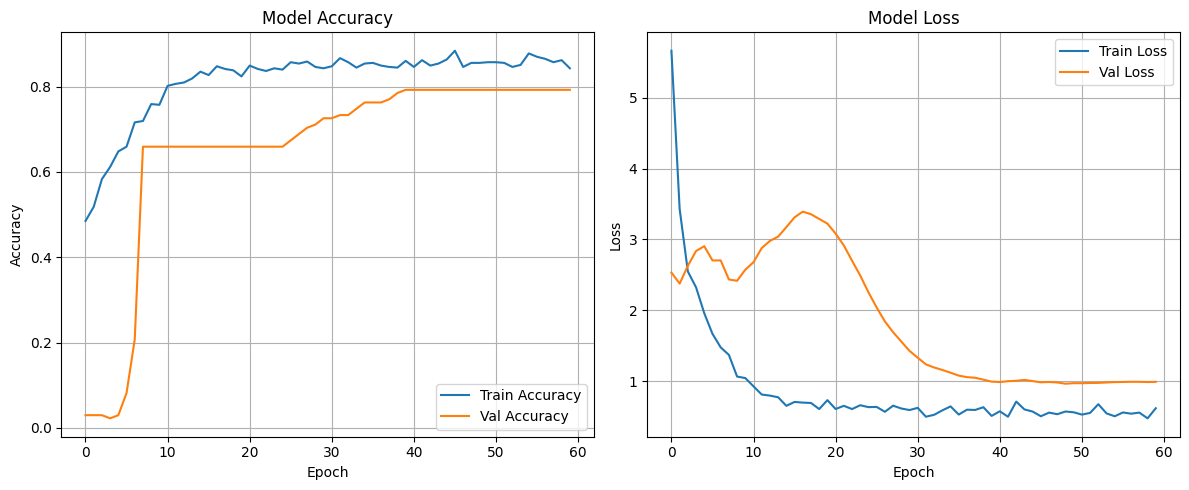

In [15]:

# Apply preprocessing to all rows
X = np.array([preprocess_fer_row(p) for p in ck["pixels"]])
y = ck['label'].values

# Encode string labels -> integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded, shuffle=True
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp, shuffle=True
)

cnn = build_light_cnn()
history = cnn.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=callbacks,
)

plot_training_history(history)

In [10]:
import joblib
# Save after fitting
joblib.dump(label_encoder, "label_encoder_CK.joblib")

# Load later
label_encoder = joblib.load("label_encoder_CK.joblib")

5/5 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         7
     disgust       0.71      0.56      0.62         9
        fear       0.00      0.00      0.00         3
       happy       0.78      0.64      0.70        11
     neutral       0.82      1.00      0.90        89
         sad       0.00      0.00      0.00         4
    surprise       1.00      0.85      0.92        13

    accuracy                           0.82       136
   macro avg       0.47      0.43      0.45       136
weighted avg       0.74      0.82      0.77       136



/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

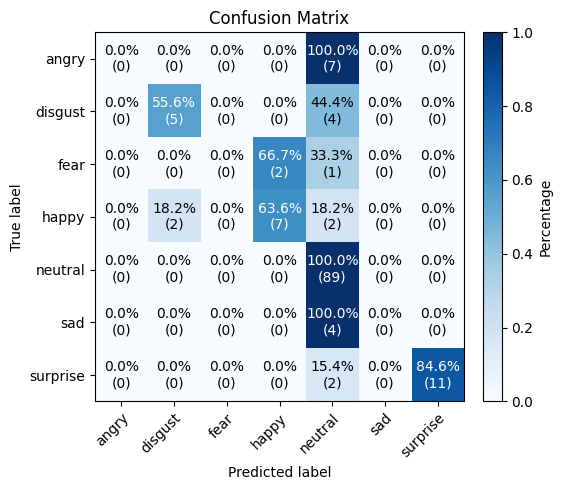

In [17]:

y_pred_probs = cnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test = label_encoder.inverse_transform(y_test)
y_pred = label_encoder.inverse_transform(y_pred)


print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)


### Test CK with FER2013 model

29/29 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.22      0.49      0.30        45
           1       0.00      0.00      0.00        59
           2       0.18      0.32      0.23        25
           3       0.75      1.00      0.86        69
           4       0.92      0.85      0.88       593
           5       0.15      0.25      0.19        28
           6       0.96      0.81      0.88        83

    accuracy                           0.75       902
   macro avg       0.45      0.53      0.48       902
weighted avg       0.77      0.75      0.75       902



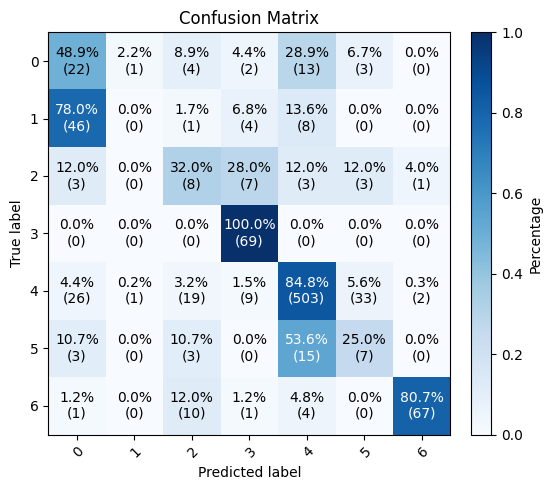

In [ ]:
# Load FER2013
label_encoder_fer = joblib.load("label_encoder_FER2013.joblib")
model = load_model("best_cnn_model_FER2013.h5")
y_pred_probs = model.predict(X)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred_labels = label_encoder_fer.inverse_transform(y_pred)
# y_pred = label_encoder_fer.transform(y_pred)
# y = label_encoder.inverse_transform(y)
y = label_encoder_fer.transform(y)
#y_test = label_encoder.inverse_transform(y_test)

print(classification_report(y, y_pred))
plot_confusion_matrix(y, y_pred)

5/5 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

       angry       0.23      0.43      0.30         7
     disgust       0.00      0.00      0.00         9
        fear       0.00      0.00      0.00         3
       happy       0.79      1.00      0.88        11
     neutral       0.94      0.84      0.89        89
         sad       0.17      0.50      0.25         4
    surprise       1.00      0.85      0.92        13

    accuracy                           0.75       136
   macro avg       0.45      0.52      0.46       136
weighted avg       0.79      0.75      0.76       136



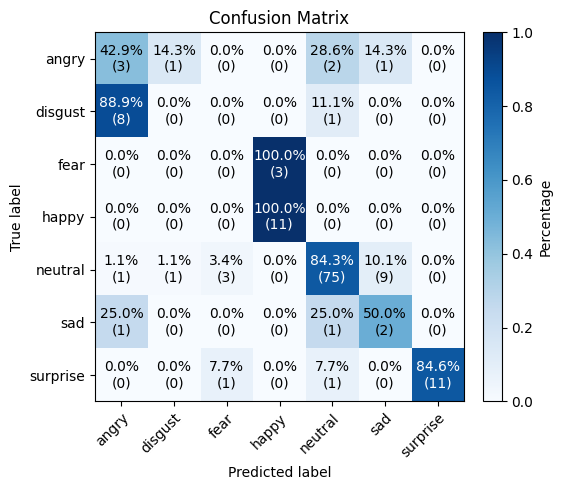

In [16]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder_fer.inverse_transform(y_pred)
#y_pred = label_encoder_fer.transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)


print(classification_report(y_test_labels, y_pred))
plot_confusion_matrix(y_test_labels, y_pred)

### Test CK model on RAF-DB

15/15 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00        24
     disgust       0.08      0.04      0.06        24
        fear       0.00      0.00      0.00        11
       happy       1.00      0.04      0.08       178
     neutral       0.23      0.95      0.38       102
         sad       0.00      0.00      0.00        72
    surprise       0.07      0.04      0.05        50

    accuracy                           0.23       461
   macro avg       0.20      0.15      0.08       461
weighted avg       0.45      0.23      0.12       461



/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

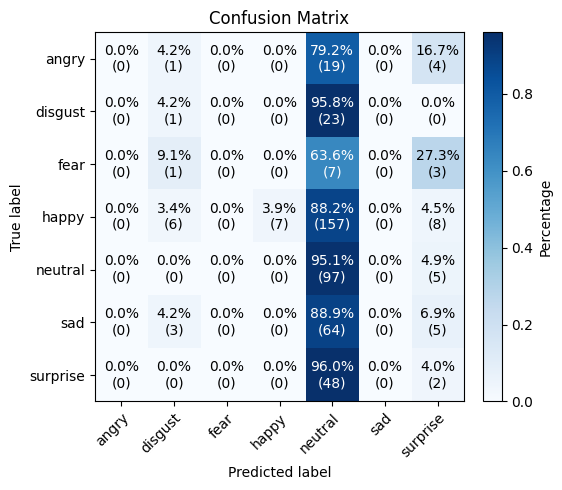

In [18]:
def preprocess_raf_row(filename):

    # read and convert image to grayscale
    image = Image.open(filename).convert('L')
    image = image.resize((48, 48))
    np_image = np.array(image).astype("float32") / 255.0
    np_image = np.expand_dims(np_image, axis=-1)
    return np_image


# Apply preprocessing to all rows
X = np.array([preprocess_raf_row(p) for p in raf["filename"]])
y = raf['label'].values

y_encoded = label_encoder.transform(y)

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded, shuffle=True
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp, shuffle=True
)

y_pred_probs = cnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

print(classification_report(y_test_labels, y_pred))
plot_confusion_matrix(y_test_labels, y_pred)

96/96 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00       162
     disgust       0.03      0.01      0.02       160
        fear       1.00      0.01      0.03        74
       happy       0.69      0.03      0.05      1185
     neutral       0.24      0.96      0.38       680
         sad       0.00      0.00      0.00       478
    surprise       0.14      0.07      0.09       329

    accuracy                           0.23      3068
   macro avg       0.30      0.16      0.08      3068
weighted avg       0.36      0.23      0.11      3068



/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

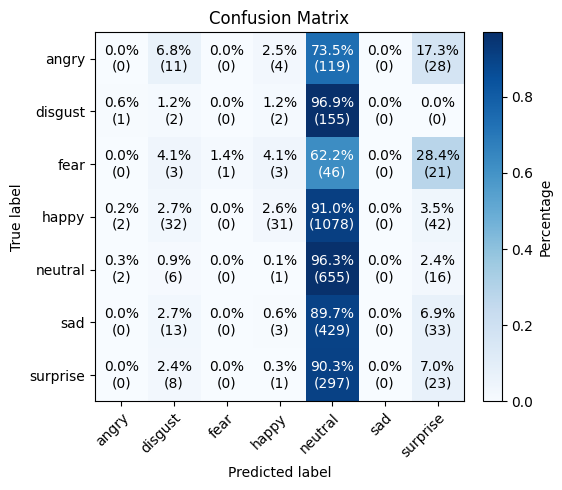

In [21]:
y_pred_probs = cnn.predict(X)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
y_test = label_encoder.inverse_transform(y_encoded)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

### Test CK model on AffectNet

62/62 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00       258
     disgust       0.09      0.14      0.11       187
        fear       0.15      0.01      0.02       250
       happy       0.20      0.01      0.02       405
     neutral       0.19      0.72      0.30       356
         sad       0.11      0.00      0.01       237
    surprise       0.17      0.15      0.16       288

    accuracy                           0.17      1981
   macro avg       0.13      0.15      0.09      1981
weighted avg       0.14      0.17      0.09      1981



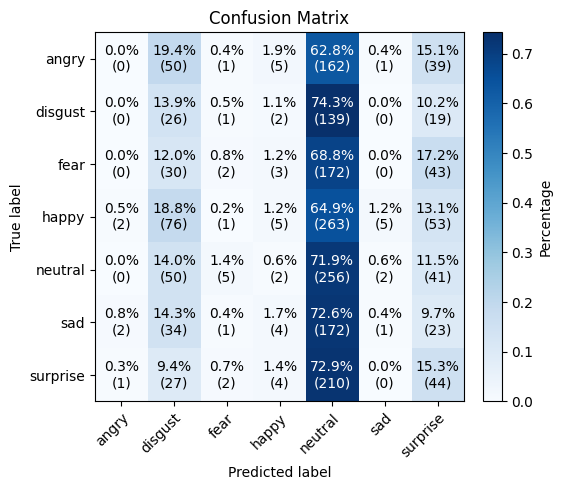

In [22]:


# Apply preprocessing to all rows
X = np.array([preprocess_raf_row(p) for p in affnet["filename"]])
y = affnet['label'].values

y_encoded = label_encoder.transform(y)

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded, shuffle=True
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp, shuffle=True
)

y_pred_probs = cnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

print(classification_report(y_test_labels, y_pred))
plot_confusion_matrix(y_test_labels, y_pred)

413/413 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

       angry       0.12      0.00      0.01      1718
     disgust       0.13      0.20      0.15      1248
        fear       0.15      0.01      0.01      1664
       happy       0.14      0.01      0.02      2704
     neutral       0.18      0.71      0.29      2368
         sad       0.05      0.00      0.00      1584
    surprise       0.18      0.16      0.17      1920

    accuracy                           0.17     13206
   macro avg       0.14      0.16      0.09     13206
weighted avg       0.14      0.17      0.10     13206



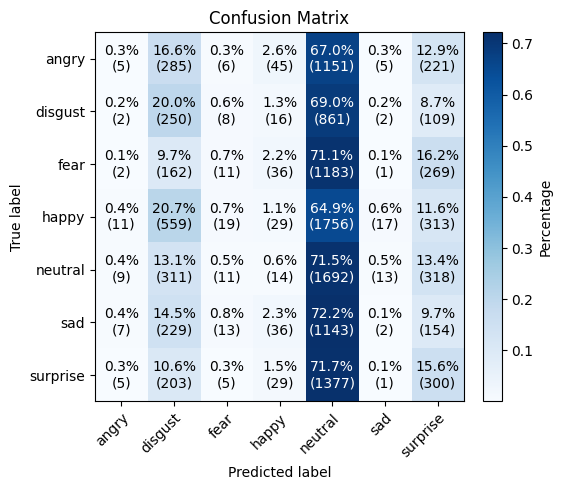

In [23]:
y_pred_probs = cnn.predict(X)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
y_test = label_encoder.inverse_transform(y_encoded)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

# RAF-DB

Epoch 1/100
68/68 [==============================] - ETA: 0s - loss: 5.0785 - accuracy: 0.3130
Epoch 1: val_accuracy did not improve from 0.69130
68/68 [==============================] - 2s 22ms/step - loss: 5.0785 - accuracy: 0.3130 - val_loss: 1.7374 - val_accuracy: 0.3870 - lr: 0.0010
Epoch 2/100
66/68 [============================>.] - ETA: 0s - loss: 3.3291 - accuracy: 0.3835
Epoch 2: val_accuracy did not improve from 0.69130
68/68 [==============================] - 1s 18ms/step - loss: 3.3263 - accuracy: 0.3838 - val_loss: 1.6502 - val_accuracy: 0.3870 - lr: 0.0010
Epoch 3/100
65/68 [===========================>..] - ETA: 0s - loss: 2.9384 - accuracy: 0.4072
Epoch 3: val_accuracy did not improve from 0.69130
68/68 [==============================] - 1s 18ms/step - loss: 2.9524 - accuracy: 0.4029 - val_loss: 2.2905 - val_accuracy: 0.2348 - lr: 0.0010
Epoch 4/100
67/68 [============================>.] - ETA: 0s - loss: 2.8980 - accuracy: 0.4095
Epoch 4: val_accuracy did not improve 

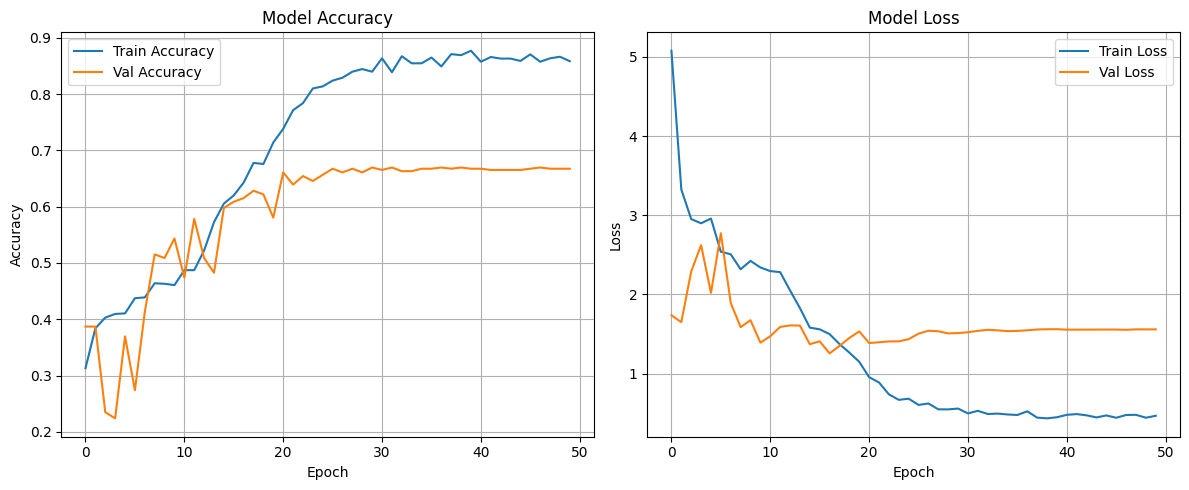

In [29]:
def preprocess_raf_row(filename):

    # read and convert image to grayscale
    image = Image.open(filename).convert('L')
    image = image.resize((48, 48))
    np_image = np.array(image).astype("float32") / 255.0
    np_image = np.expand_dims(np_image, axis=-1)
    return np_image


# Apply preprocessing to all rows
X = np.array([preprocess_raf_row(p) for p in raf["filename"]])
y = raf['label'].values

# Encode string labels -> integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded, shuffle=True
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp, shuffle=True
)

cnn = build_light_cnn()
history = cnn.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=callbacks,
)

plot_training_history(history)

15/15 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

       angry       0.50      0.33      0.40        24
     disgust       0.38      0.25      0.30        24
        fear       1.00      0.18      0.31        11
       happy       0.76      0.85      0.80       178
     neutral       0.65      0.71      0.68       102
         sad       0.53      0.54      0.53        72
    surprise       0.69      0.58      0.63        50

    accuracy                           0.67       461
   macro avg       0.64      0.49      0.52       461
weighted avg       0.66      0.67      0.66       461



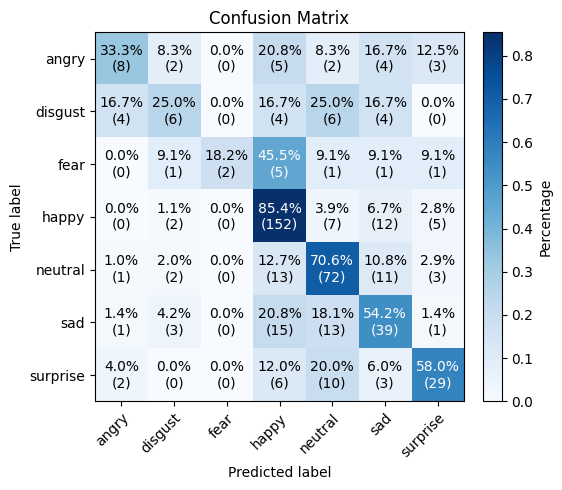

In [30]:
y_pred_probs = cnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

print(classification_report(y_test_labels, y_pred))
plot_confusion_matrix(y_test_labels, y_pred)

### RAF-DB model on FER2013

169/169 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

       angry       0.23      0.11      0.15       743
     disgust       0.02      0.10      0.04        82
        fear       0.29      0.03      0.05       768
       happy       0.44      0.52      0.48      1349
     neutral       0.29      0.28      0.28       930
         sad       0.24      0.38      0.29       912
    surprise       0.32      0.36      0.34       600

    accuracy                           0.30      5384
   macro avg       0.26      0.25      0.23      5384
weighted avg       0.31      0.30      0.28      5384



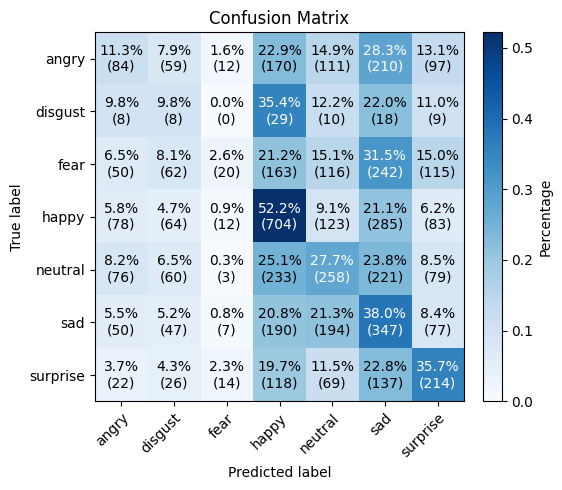

In [31]:
# Apply preprocessing to all rows
X = np.array([preprocess_fer_row(p) for p in fer["pixels"]])
y = fer['label'].values

# Encode string labels -> integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded, shuffle=True
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp, shuffle=True
)

y_pred_probs = cnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

print(classification_report(y_test_labels, y_pred))
plot_confusion_matrix(y_test_labels, y_pred)

1122/1122 [==============================] - 6s 6ms/step
              precision    recall  f1-score   support

       angry       0.24      0.11      0.15      4953
     disgust       0.02      0.10      0.04       547
        fear       0.26      0.03      0.05      5121
       happy       0.45      0.52      0.49      8989
     neutral       0.30      0.29      0.29      6198
         sad       0.23      0.38      0.29      6077
    surprise       0.31      0.34      0.32      4002

    accuracy                           0.30     35887
   macro avg       0.26      0.25      0.23     35887
weighted avg       0.31      0.30      0.29     35887



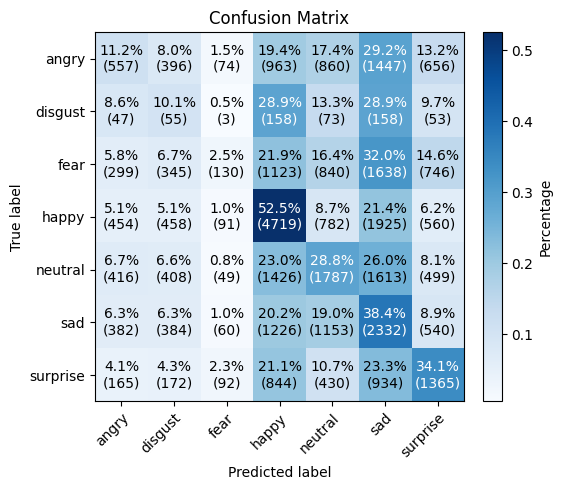

In [32]:
y_pred_probs = cnn.predict(X)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_encoded)

print(classification_report(y_test_labels, y_pred))
plot_confusion_matrix(y_test_labels, y_pred)

### RAF-DB model on CK+

5/5 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

       angry       0.05      0.14      0.08         7
     disgust       0.25      0.11      0.15         9
        fear       0.00      0.00      0.00         3
       happy       0.36      0.82      0.50        11
     neutral       0.85      0.57      0.68        89
         sad       0.10      0.25      0.14         4
    surprise       0.47      0.62      0.53        13

    accuracy                           0.52       136
   macro avg       0.30      0.36      0.30       136
weighted avg       0.65      0.52      0.56       136



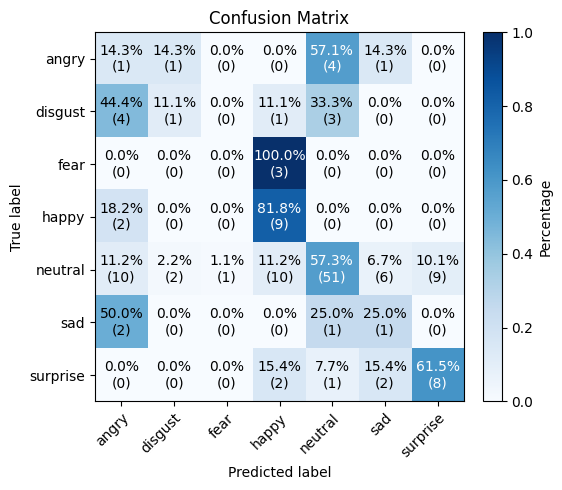

In [33]:
# Apply preprocessing to all rows
X = np.array([preprocess_fer_row(p) for p in ck["pixels"]])
y = ck['label'].values

# Encode string labels -> integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded, shuffle=True
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp, shuffle=True
)

y_pred_probs = cnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

print(classification_report(y_test_labels, y_pred))
plot_confusion_matrix(y_test_labels, y_pred)

29/29 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

       angry       0.07      0.27      0.11        45
     disgust       0.20      0.08      0.12        59
        fear       0.00      0.00      0.00        25
       happy       0.33      0.80      0.46        69
     neutral       0.83      0.50      0.62       593
         sad       0.05      0.14      0.08        28
    surprise       0.46      0.55      0.50        83

    accuracy                           0.46       902
   macro avg       0.28      0.33      0.27       902
weighted avg       0.63      0.46      0.50       902



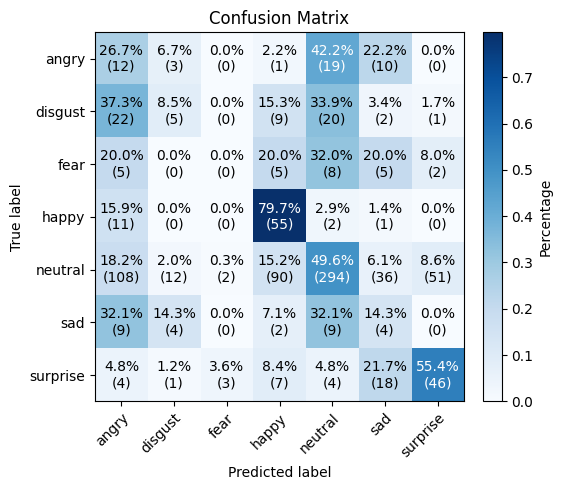

In [34]:
y_pred_probs = cnn.predict(X)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_encoded)

print(classification_report(y_test_labels, y_pred))
plot_confusion_matrix(y_test_labels, y_pred)

### RAF-DB model on AffectNet

62/62 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

       angry       0.24      0.12      0.16       258
     disgust       0.14      0.09      0.10       187
        fear       0.25      0.04      0.06       250
       happy       0.20      0.13      0.15       405
     neutral       0.21      0.34      0.26       356
         sad       0.14      0.41      0.21       237
    surprise       0.24      0.14      0.17       288

    accuracy                           0.18      1981
   macro avg       0.20      0.18      0.16      1981
weighted avg       0.20      0.18      0.17      1981



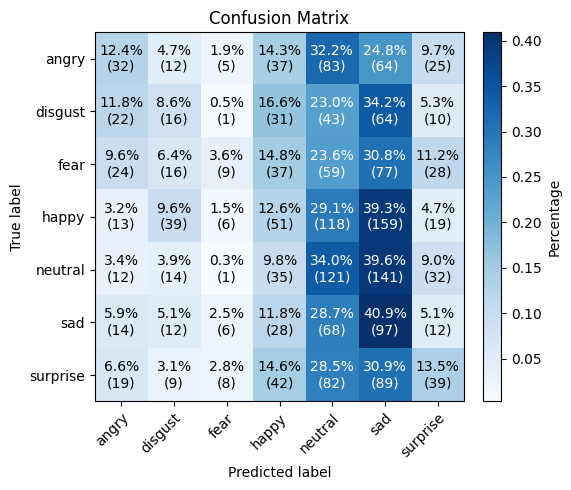

In [35]:
# Apply preprocessing to all rows
X = np.array([preprocess_raf_row(p) for p in affnet["filename"]])
y = affnet['label'].values

y_encoded = label_encoder.transform(y)

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded, shuffle=True
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp, shuffle=True
)

y_pred_probs = cnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

print(classification_report(y_test_labels, y_pred))
plot_confusion_matrix(y_test_labels, y_pred)

413/413 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

       angry       0.29      0.14      0.19      1718
     disgust       0.11      0.08      0.09      1248
        fear       0.24      0.03      0.05      1664
       happy       0.17      0.12      0.14      2704
     neutral       0.23      0.36      0.28      2368
         sad       0.13      0.36      0.19      1584
    surprise       0.23      0.12      0.16      1920

    accuracy                           0.18     13206
   macro avg       0.20      0.17      0.16     13206
weighted avg       0.20      0.18      0.16     13206



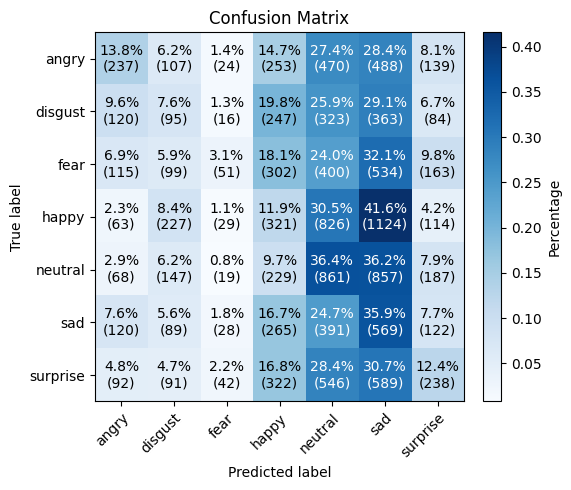

In [36]:
y_pred_probs = cnn.predict(X)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_encoded)

print(classification_report(y_test_labels, y_pred))
plot_confusion_matrix(y_test_labels, y_pred)

# AffectNet

Epoch 1/100
289/289 [==============================] - ETA: 0s - loss: 4.2440 - accuracy: 0.2590
Epoch 1: val_accuracy did not improve from 0.66739
289/289 [==============================] - 7s 23ms/step - loss: 4.2440 - accuracy: 0.2590 - val_loss: 2.2381 - val_accuracy: 0.2155 - lr: 0.0010
Epoch 2/100
288/289 [============================>.] - ETA: 0s - loss: 2.9840 - accuracy: 0.3608
Epoch 2: val_accuracy did not improve from 0.66739
289/289 [==============================] - 5s 18ms/step - loss: 2.9843 - accuracy: 0.3610 - val_loss: 1.7826 - val_accuracy: 0.4114 - lr: 0.0010
Epoch 3/100
286/289 [============================>.] - ETA: 0s - loss: 2.5934 - accuracy: 0.4048
Epoch 3: val_accuracy did not improve from 0.66739
289/289 [==============================] - 5s 18ms/step - loss: 2.5947 - accuracy: 0.4050 - val_loss: 1.7710 - val_accuracy: 0.4281 - lr: 0.0010
Epoch 4/100
287/289 [============================>.] - ETA: 0s - loss: 2.2938 - accuracy: 0.4449
Epoch 4: val_accuracy di

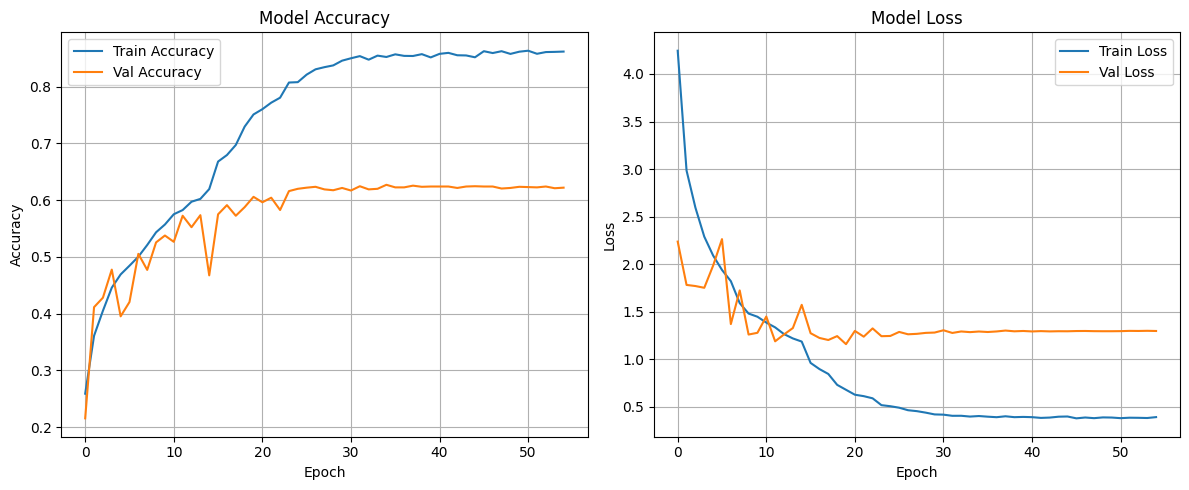

In [8]:
# Apply preprocessing to all rows
X = np.array([preprocess_raf_row(p) for p in affnet["filename"]])
y = affnet['label'].values

# Encode string labels -> integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded, shuffle=True
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp, shuffle=True
)

cnn = build_light_cnn()
history = cnn.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=callbacks,
)

plot_training_history(history)

62/62 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

       angry       0.54      0.49      0.52       258
     disgust       0.38      0.27      0.31       187
        fear       0.44      0.39      0.41       250
       happy       0.90      0.91      0.90       405
     neutral       0.84      0.85      0.85       356
         sad       0.34      0.46      0.39       237
    surprise       0.46      0.48      0.47       288

    accuracy                           0.60      1981
   macro avg       0.56      0.55      0.55      1981
weighted avg       0.60      0.60      0.60      1981



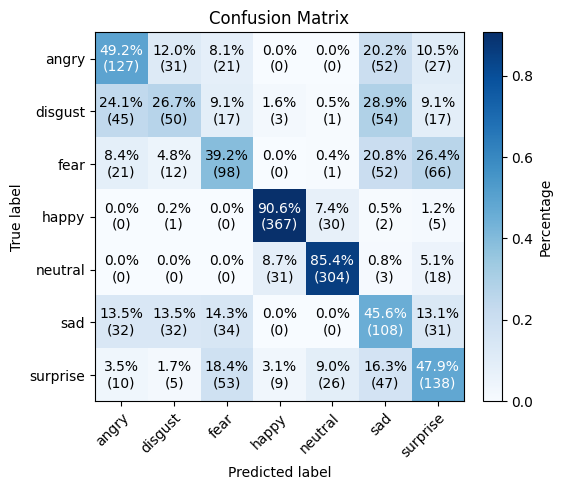

In [9]:
y_pred_probs = cnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

print(classification_report(y_test_labels, y_pred))
plot_confusion_matrix(y_test_labels, y_pred)

### AffectNEt model on CK+

5/5 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         7
     disgust       0.07      0.11      0.09         9
        fear       0.00      0.00      0.00         3
       happy       0.37      0.91      0.53        11
     neutral       0.78      0.61      0.68        89
         sad       0.09      0.25      0.13         4
    surprise       0.38      0.38      0.38        13

    accuracy                           0.52       136
   macro avg       0.24      0.32      0.26       136
weighted avg       0.59      0.52      0.54       136



/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

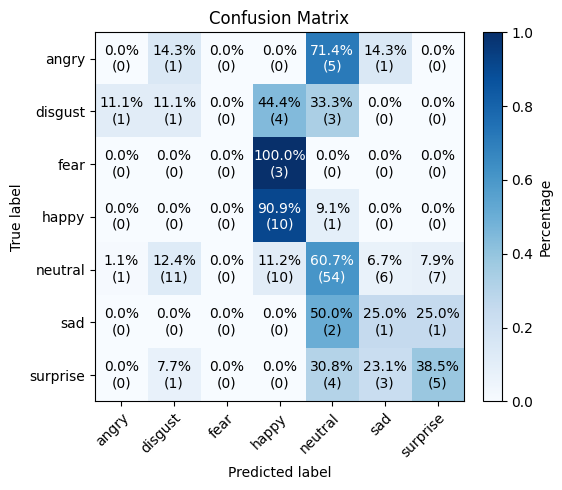

In [26]:
# Apply preprocessing to all rows
X = np.array([preprocess_fer_row(p) for p in ck["pixels"]])
y = ck['label'].values

# Encode string labels -> integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded, shuffle=True
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp, shuffle=True
)

y_pred_probs = cnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

print(classification_report(y_test_labels, y_pred))
plot_confusion_matrix(y_test_labels, y_pred)

29/29 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

       angry       0.18      0.11      0.14        45
     disgust       0.09      0.17      0.11        59
        fear       0.00      0.00      0.00        25
       happy       0.37      0.88      0.53        69
     neutral       0.78      0.58      0.67       593
         sad       0.07      0.21      0.11        28
    surprise       0.48      0.40      0.43        83

    accuracy                           0.51       902
   macro avg       0.28      0.34      0.28       902
weighted avg       0.60      0.51      0.54       902



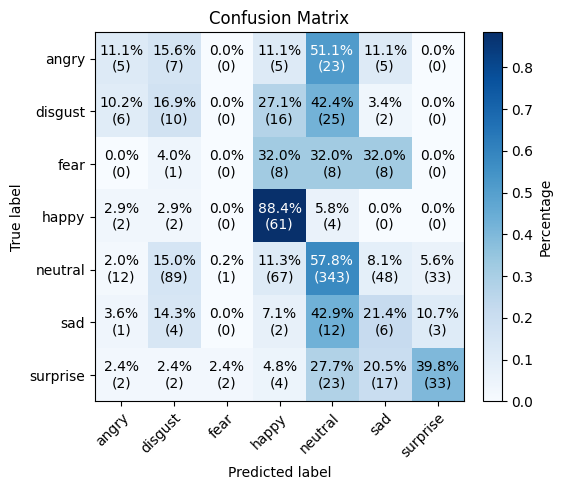

In [27]:
y_pred_probs = cnn.predict(X)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_encoded)

print(classification_report(y_test_labels, y_pred))
plot_confusion_matrix(y_test_labels, y_pred)

### AffectNet model on FER2013

169/169 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

       angry       0.31      0.15      0.20       743
     disgust       0.02      0.06      0.03        82
        fear       0.15      0.02      0.04       768
       happy       0.44      0.51      0.47      1349
     neutral       0.29      0.34      0.32       930
         sad       0.23      0.28      0.26       912
    surprise       0.25      0.35      0.29       600

    accuracy                           0.30      5384
   macro avg       0.24      0.24      0.23      5384
weighted avg       0.29      0.30      0.28      5384



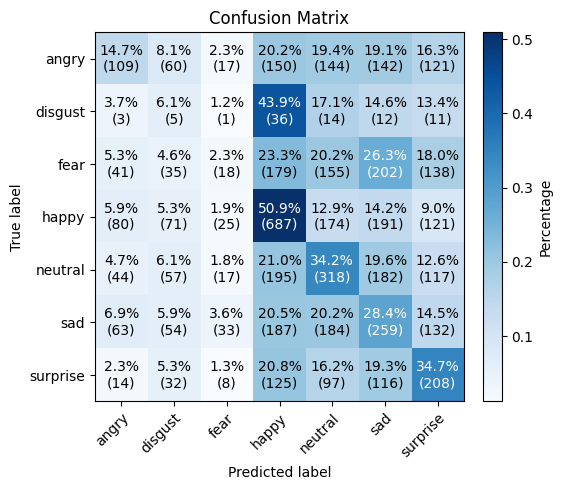

In [28]:
# Apply preprocessing to all rows
X = np.array([preprocess_fer_row(p) for p in fer["pixels"]])
y = fer['label'].values

# Encode string labels -> integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded, shuffle=True
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp, shuffle=True
)

y_pred_probs = cnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

print(classification_report(y_test_labels, y_pred))
plot_confusion_matrix(y_test_labels, y_pred)

In [ ]:
y_pred_probs = cnn.predict(X)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_encoded)

print(classification_report(y_test_labels, y_pred))
plot_confusion_matrix(y_test_labels, y_pred)

### AffectNEt model on RAF-DB

15/15 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

       angry       0.25      0.29      0.27        24
     disgust       0.10      0.08      0.09        24
        fear       0.10      0.45      0.16        11
       happy       0.50      0.01      0.02       178
     neutral       1.00      0.01      0.02       102
         sad       0.19      0.67      0.29        72
    surprise       0.20      0.40      0.27        50

    accuracy                           0.18       461
   macro avg       0.33      0.27      0.16       461
weighted avg       0.49      0.18      0.11       461



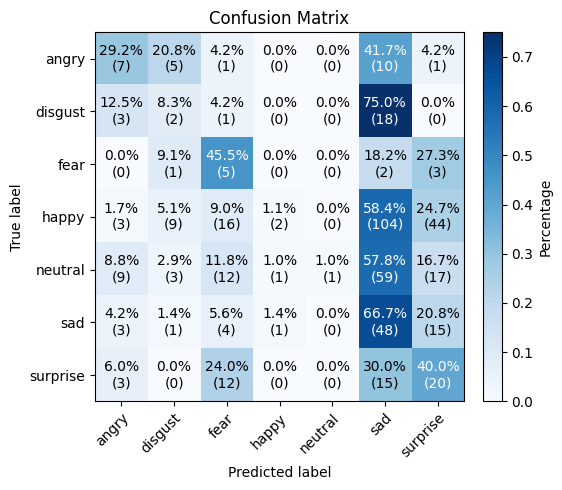

In [10]:
# Apply preprocessing to all rows
X = np.array([preprocess_raf_row(p) for p in raf["filename"]])
y = raf['label'].values

y_encoded = label_encoder.transform(y)

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded, shuffle=True
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp, shuffle=True
)

y_pred_probs = cnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

print(classification_report(y_test_labels, y_pred))
plot_confusion_matrix(y_test_labels, y_pred)

96/96 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

       angry       0.25      0.30      0.27       162
     disgust       0.10      0.09      0.10       160
        fear       0.08      0.31      0.12        74
       happy       0.30      0.01      0.02      1185
     neutral       0.47      0.01      0.03       680
         sad       0.19      0.68      0.29       478
    surprise       0.22      0.43      0.29       329

    accuracy                           0.19      3068
   macro avg       0.23      0.26      0.16      3068
weighted avg       0.29      0.19      0.11      3068



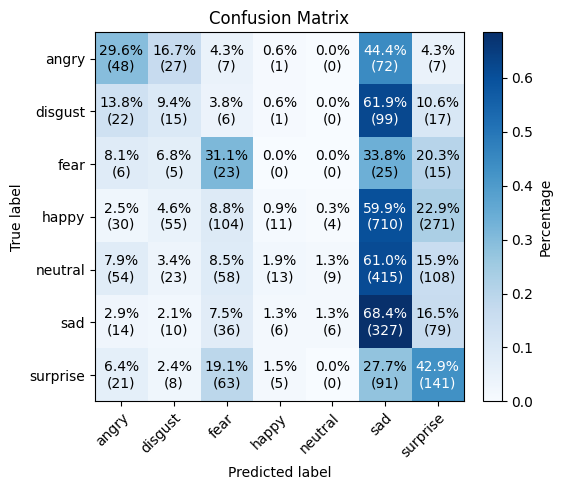

In [11]:
y_pred_probs = cnn.predict(X)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_encoded)

print(classification_report(y_test_labels, y_pred))
plot_confusion_matrix(y_test_labels, y_pred)

In [ ]:
from skimage.filters import gabor

def preprocess_with_gabor(frame, target_size=(48, 48)):
    """
    Preprocess frame -> grayscale -> resize -> gabor filter stack
    Returns array (H, W, C) with 4–5 channels (depending on config)
    """
    # Convert to gray
    if not frame.mode == 'RGB':
        frame = frame.convert('RGB')
    gray = cv2.cvtColor(np.array(frame), cv2.COLOR_RGB2GRAY)
    gray = cv2.resize(gray, target_size).astype(np.float32) / 255.0

    # Gabor responses (4 orientations)
    gabor_stack = gabor_features(gray)

    # Optionally include original gray image as first channel
    features = np.concatenate([np.expand_dims(gray, -1), gabor_stack], axis=-1)  # (H, W, 5)

    return features
